## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours take place in Duke 209 -- [Office Hours Schedule](https://joannabieri.com/schedule.html)
- [Class Website](https://joannabieri.com/data201.html)
- [Syllabus](https://joannabieri.com/data201/IntermediateDataScience.pdf)

## Introduction to Linear and Logistic Regression

- **Linear Regression** - for predicting *continuous* outcomes (e.g., prices, scores). It is a true regression model where we are trying to fit a straight line to some data!
- **Logistic Regression** - for predicting *categorical* outcomes (e.g., yes/no, 0/1). This is a classification model! A way to take the idea of linear regression and turn it into classification.

We'll explore:
1. The basic ideas behind each model  
2. How to fit and interpret them using `scikit-learn`  
3. How to visualize and evaluate model performance


## 1. Background: Linear Regression  
The goal of linear regression is to model a relationship between one (or more) predictor variables $x$ and a **continuous** target variable $y$. The simplest form (one predictor) is  

$$
\hat{y} = w_0 + w_1 x
$$

For multiple predictors we would just have more variables:

$$
\hat{y} = w_0 + w_1 x_1 + \cdots + w_p x_p
$$

The goal is to find constants $w_n$ that give us the best "fit" or prediction. 

The common approach (ordinary least squares) is to choose the constants $w_i$ to minimize the sum of squared errors or residuals:  

$$
\sum_{i=1}^n (y_i^{real}-y_i^{predicted})^2 = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

In this context the "machine learning" is figuring out what these constants should be!

In this basic formulation we are assuming that the data is in fact linear. My choosing a linear regression model this is your basic assumption. We will have ways to think, numerically, about whether or not this is a good assumption.


In [1]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc


Let's do linear regression on a fake dataset so we can see the overall process.

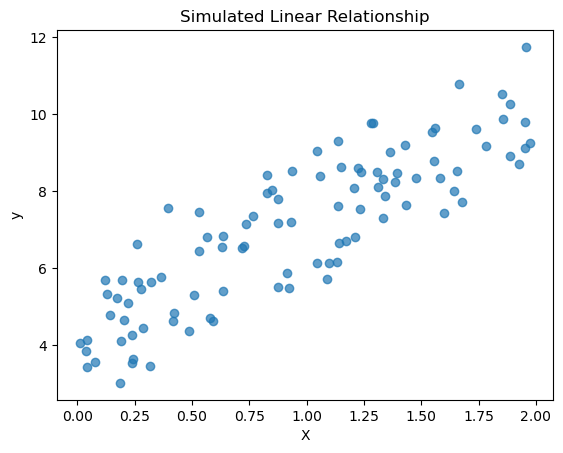

In [2]:
# Generate a synthetic dataset
np.random.seed(0)
n_samples = 100
X = 2.0 * np.random.rand(n_samples, 1)
y = 4.0 + 3.0 * X[:,0] + np.random.randn(n_samples)  # y = 4 + 3x + noise

plt.scatter(X, y, alpha=0.7)
plt.title("Simulated Linear Relationship")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

We always want to split our data into a training and testing set so that we can text our model on data that it has not seen before!

In [3]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Then we define our model and train (fit) the model. In the case of linear regression with one variable we get two constants out of the model: the slope and the intercept.

In [4]:
# Fit linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("Intercept (w0):", linreg.intercept_)
print("Coefficient (w1):", linreg.coef_[0])

Intercept (w0): 4.206340188711437
Coefficient (w1): 2.99025910100489


Now that we have a trained model we can see how well it does using the testing data.

MSE on test set: 0.918
R² on test set: 0.652


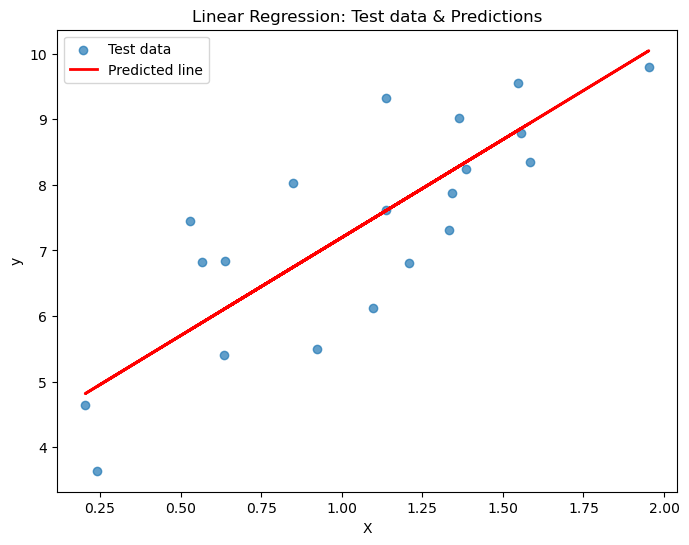

In [5]:
# Predict and evaluate
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE on test set: {mse:.3f}")
print(f"R² on test set: {r2:.3f}")

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, alpha=0.7, label='Test data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Test data & Predictions")
plt.legend()
plt.show()


## Understanding MSE and R² on the Test Set

### 1. Mean Squared Error (MSE)
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- Measures the **average squared difference** between predicted values $(\hat{y}_i)$ and actual values $(y_i)$.  
- Considering the results above:
  - On average, the squared error for each prediction is 0.918.  
  - Smaller MSE means predictions are closer to actual values.  
  - Since it's squared, the units are also squared; the square root gives **RMSE** root mean squared error. This is nice for interpreting results.

### 2. Coefficient of Determination (R²)
$$
R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}
$$

- Measures how much of the **variance in the target** is explained by the model.  
- Considering the results above: 
  - About **65.2% of the variance in the test data** is explained by the model.  
  - Interpretation of R² values:
    - 1 = perfect fit
    - 0 = model predicts no better than the mean
    - <0 = model performs worse than predicting the mean

### Caution 
- Non-linear relationships or outliers can keep MSE high and R² moderate.  
- You really should check both!


## What if our data was nonlinear?

Let's try to apply linear regression to data that is clearly nonlinear!

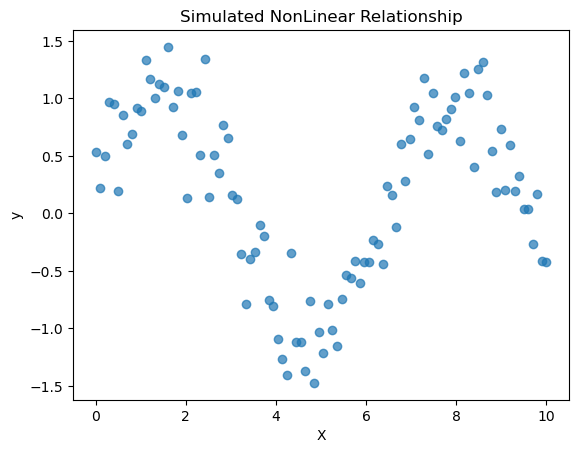

In [6]:
# Generate a synthetic dataset
np.random.seed(0)
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y = np.sin(X[:,0]) + 0.3 * np.random.randn(n_samples)  # sine wave with noise

plt.scatter(X, y, alpha=0.7)
plt.title("Simulated NonLinear Relationship")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [7]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Fit linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("Intercept (w0):", linreg.intercept_)
print("Coefficient (w1):", linreg.coef_[0])

Intercept (w0): 0.3072737463951389
Coefficient (w1): -0.024499542550640397


MSE on test set: 0.612
R² on test set: 0.005


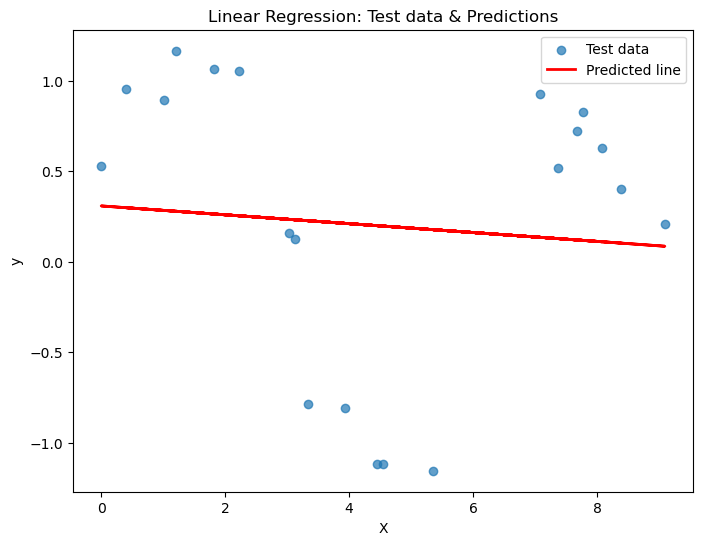

In [9]:
# Predict and evaluate
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE on test set: {mse:.3f}")
print(f"R² on test set: {r2:.3f}")

# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, alpha=0.7, label='Test data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Test data & Predictions")
plt.legend()
plt.show()

How did we do? Is this a good predictor?



## Polynomial (Quadratic) Regression vs Linear Regression

### Linear Regression

Linear regression models the relationship between variables (features/predictors) X and the target y as a **straight line**!

  $$\hat y = w_0 + w_1 x_1 + \dots + w_p x_p$$

But not all data is linear! 

### Polynomial Regression (e.g., Quadratic)

Our goal is to extend linear regression by including **powers of predictors** and/or interactions:  

  $$\hat y = w_0 + w_1 x + w_2 x^2 + \dots$$
  
This allows us to model **curved relationships** between predictors and the target.

If we wanted we could also use non polynomial functions for either the variables or the target!

$$\hat y = w_0 + w_1 \ln(x)$$   

$$\ln(\hat y) = w_0 + w_1 x$$

This process still fits a linear model in terms of coefficients, but the model can capture nonlinear relationships in the data

So if we look at our data above, should we have used a linear function or maybe something else?

## Over vs. Underfitting

Let's try doing polynomial regression on the data above to see if we can get a better fit. In this case we are going to use the Polynomial Features function to create new polynomial variables.

In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Choose a second degree polynomial
degree = 2

# Transform the x variables to be both x and x^2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
# Fit linear regression
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

# Now we will have three coefficients
print("Intercept (w0):", linreg.intercept_)
print("Coefficient (w1):", linreg.coef_[0])
print("Coefficient (w2):", linreg.coef_[1])

Intercept (w0): 1.1429933136914656
Coefficient (w1): -0.5125048890339421
Coefficient (w2): 0.04789627715549682


So our model is given by

$$\hat{y} = w_0 + w_1 x + w_2 x^2$$

MSE on test set: 0.412
R² on test set: 0.329


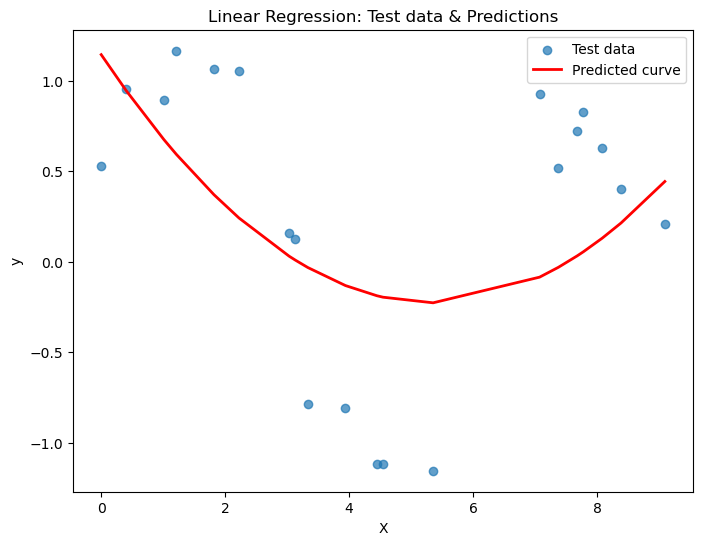

In [12]:
# Predict and evaluate
y_pred = linreg.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE on test set: {mse:.3f}")
print(f"R² on test set: {r2:.3f}")

sorted_idx = X_test[:, 0].argsort()
# Plot the results
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, alpha=0.7, label='Test data')
plt.plot(X_test[sorted_idx], y_pred[sorted_idx], color='red', linewidth=2, label='Predicted curve')

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression: Test data & Predictions")
plt.legend()
plt.show()

Did we do better that before? What happens if we try a cubic?

$$\hat{y} = w_0 + w_1 x + w_2 x^2 + w_3 x^3$$

or higher?

In [13]:
def poly_regress(X_train, X_test, n):
    poly = PolynomialFeatures(degree=n, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    linreg = LinearRegression()
    linreg.fit(X_train_poly, y_train)
    
    y_pred = linreg.predict(X_train_poly)
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    print(f"MSE on training set: {mse:.3f}")
    print(f"R² on training set: {r2:.3f}")
    print('---')
    
    y_pred = linreg.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE on test set: {mse:.3f}")
    print(f"R² on test set: {r2:.3f}")
    
    sorted_idx = X_test[:, 0].argsort()
    # Plot the results
    plt.figure(figsize=(4,3))
    plt.scatter(X_test, y_test, alpha=0.7, label='Test data')
    plt.plot(X_test[sorted_idx], y_pred[sorted_idx], color='red', linewidth=2, label='Predicted curve')
    
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Linear Regression: Test data & Predictions")
    plt.legend()
    plt.show()

Linear regression with 3-degree polynomial
MSE on training set: 0.409
R² on training set: 0.299
---
MSE on test set: 0.399
R² on test set: 0.351


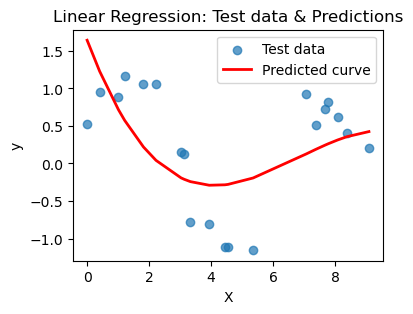

Linear regression with 6-degree polynomial
MSE on training set: 0.076
R² on training set: 0.870
---
MSE on test set: 0.098
R² on test set: 0.841


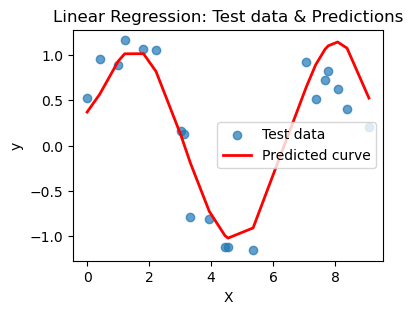

Linear regression with 10-degree polynomial
MSE on training set: 0.075
R² on training set: 0.871
---
MSE on test set: 0.095
R² on test set: 0.845


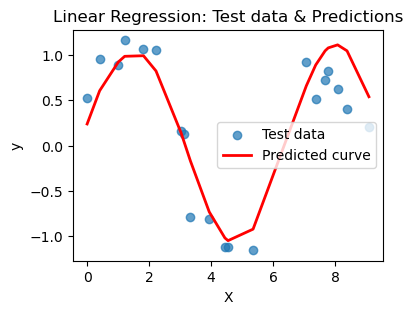

Linear regression with 16-degree polynomial
MSE on training set: 0.085
R² on training set: 0.855
---
MSE on test set: 0.118
R² on test set: 0.808


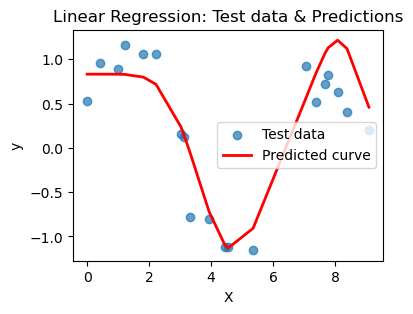

Linear regression with 20-degree polynomial
MSE on training set: 0.165
R² on training set: 0.717
---
MSE on test set: 0.236
R² on test set: 0.615


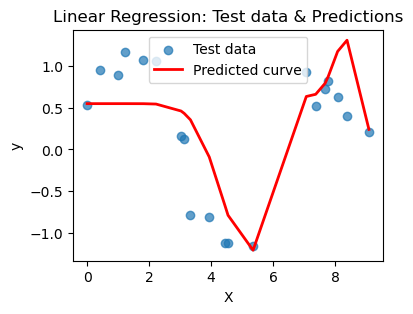

In [14]:
for n in [3,6,10,16,20]:
    print(f'Linear regression with {n}-degree polynomial')
    poly_regress(X_train, X_test, n=n)

What you should notice here is that we can actually choose a polynomial of too high a degree. This encourages your model to just pick a really jagged line that goes exactly through all the points, effectively memorizing the data. BUT when you ask it to predict on a new point, that point may not be on the somewhat crazy curve you find. This is **overfitting** and **poor model selection**. You do not want your model to memorize the data! You want to choose a curve that matches the trend of the data without memorizing it.

## You try

Re-run the code and see if you can find a way to choose the best polynomial for the job. Remember the goal is to be complicated enough to pick up the patern in the data without being overly complicated. Here are some things to try:

1. Create models for a range of degrees and keep track of the MSE and R^2 for both the testing and training data (save these to a list). Then make a plot of the results. Can you use the graph to argue which degree you think is best?
2. Try plotting the magnitude of the error |(Real-Predicted)| for each value in the test set. Do this for a few choices of the degree. If your model is capturing all of the pattern in the data, then the remaining randomness should look fairly random.

## Background: Logistic Regression  
While linear regression predicts a continuous outcome, logistic regression is used for **classification** (typically binary)  modeling the probability that an outcome belongs to class 1 (versus 0).  

Mathematically one models the log-odds (the “logit”) as a linear combination:  

$$
\log \frac{p}{1-p} = w_0 + w_1 x_1 + \cdots + w_p x_p
$$

This is making the assumption that the data can be separated by a straight line!

Then the probability is  

$$
p = \frac{1}{1 + e^{-(w_0 + w_1 x_1 + \cdots + w_p x_p)}}
$$

That is, the “sigmoid” (“logistic”) function maps the linear part back into the interval $(0,1)$. The closer the probability is to 0, the more likely the observation belongs to class 0. You have to decide on what the cutoff is (e.g., $p > 0.5$ = class 1 and $p <= 0.5$ = class 0)
 
In this case the coefficients $w$ relate to log-odds: a 1-unit increase in $x_j$ multiplies odds by $e^{w_j}$.  

It is STILL a linear model in the log-odds space (it is a linear combination of predictors) but when we apply the sigmoid function it becomes a non-linear mapping in output.  

Let's visualize this in one dimension

Imagine we have the following data:

| (x) | (y) |
| ----------------- | -------- |
| 1                 | 0        |
| 2                 | 0        |
| 3                 | 0        |
| 4                 | 1        |
| 5                 | 1        |
| 6                 | 1        |

And we want to use $x$ to predict $y$


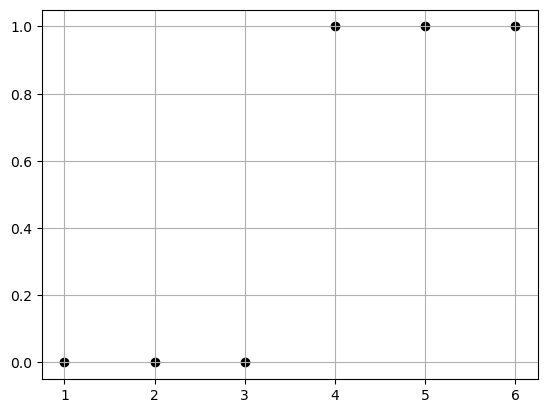

In [15]:
plt.scatter([1, 2, 3, 4, 5, 6], [0, 0, 0, 1, 1, 1], color="black", label="Sample data")
plt.grid(True)
plt.show()

Well if we were doing this bu hand we would say, we'll if I draw a line between 3 and 4, then I can use that as a cutoff for how to classify future data.

eq. Here is a new data point x=2.5, is it more likely to belong to class 0 or class 1?

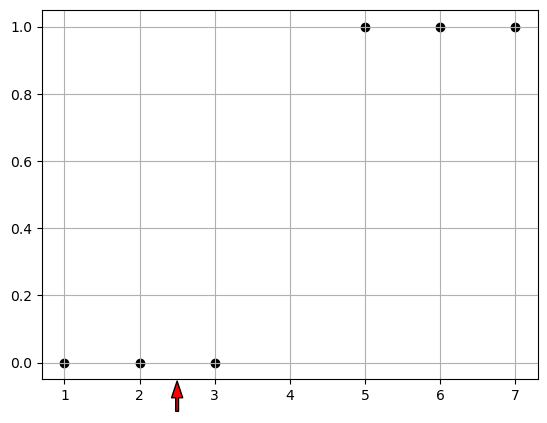

In [16]:
plt.scatter([1, 2, 3, 5, 6, 7], [0, 0, 0, 1, 1, 1], color="black", label="Sample data")
plt.grid(True)


plt.annotate(
    '', 
    xy=(2.5, -0.05),     # arrow tip (just below x-axis)
    xytext=(2.5, -0.15), # arrow tail
    arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8)
)

plt.show()

So we say "Given a data point $x$, what is the probability that it is in class 1?"

$$p(y=1|x)$$

Well the "odds" that x is a member of class 1 are given by:

$$ odds = \frac{p}{1-p} $$

this is just the ratio of the probability of yes vs probability of no.

- p=0.5, odds = 1  so there is an equal chance of class 1/class 2.
- p=0.8, odds = 4 so it is 4 times more likely to be class 1.
- p=0.2, odds = 0.25 so it is 4 times more likely to be class 0.

We assume that the odds are a linear relationship with one variable x:

$$
\log \frac{p}{1-p} = w_0 + w_1 x
$$

In this simple case we find $w_0 = -4$ and $w_1=1$

Then we can convert this back into a probability

$$
p = \frac{1}{1 + e^{-(-4+ x)}}
$$

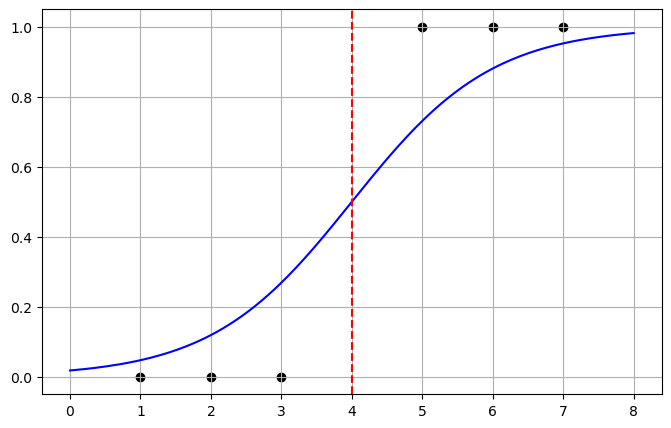

In [17]:
# Parameters
w0 = -4
w1 = 1

# Data for plotting
x = np.linspace(0, 8, 200)
p = 1 / (1 + np.exp(-(w0 + w1 * x)))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, p, color="blue", label=r"$P(\text{pass} | x) = \frac{1}{1+e^{-(x-4)}}$")
plt.axvline(4, color="red", linestyle="--", label="x = 4 (50% chance)")
plt.scatter([1, 2, 3, 5, 6, 7], [0, 0, 0, 1, 1, 1], color="black", label="Sample data")
plt.grid(True)
plt.show()

Now we can interpret this as given a point if the probability is less then $0.5$ the it belongs to class 0 and otherwise to class 1. This matches our intuition.

Here is an example with more than one variable:

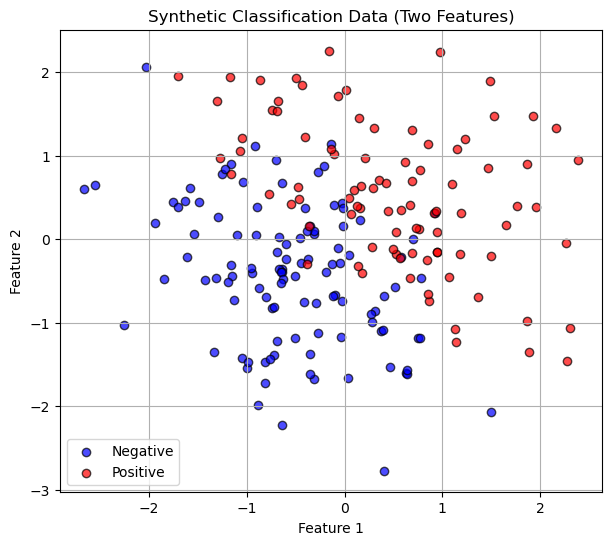

In [18]:
# Generate synthetic binary classification data
np.random.seed(0)
n_samples = 200
X1 = np.random.randn(n_samples, 2)
y1 = (X1[:,0] + X1[:,1] + 0.5 * np.random.randn(n_samples) > 0).astype(int)

# Scatter plot
plt.figure(figsize=(7,6))
plt.scatter(X1[y1==0, 0], X1[y1==0, 1], color='blue', alpha=0.7, label='Negative', edgecolor='k')
plt.scatter(X1[y1==1, 0], X1[y1==1, 1], color='red', alpha=0.7, label='Positive', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Classification Data (Two Features)")
plt.legend()
plt.grid(True)
plt.show()

We still want to to a test train split!


In [19]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

Now train the model using Logistic Regression!

In [20]:
# Fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Intercept (w0):", logreg.intercept_[0])
print("Coefficients (w1,w2):", logreg.coef_[0])

Intercept (w0): -0.1949041499390587
Coefficients (w1,w2): [2.28689566 2.12914333]


Here we see our coefficients. This means that:

$$
\log \frac{p}{1-p} = w_0 + w_1 x_1 + w_2 x_2
$$

In this simple case we find $w_0 = -4$ and $w_1=1$

Then we can convert this back into a probability

$$
p = \frac{1}{1 + e^{-(w_0 + w_1 x_1 + w_2 x_2)}}
$$

So we might say if $p>0.5$ then we are positive and if $p<0.5$ we are negative. Here is a plot of this linear decision boundary.

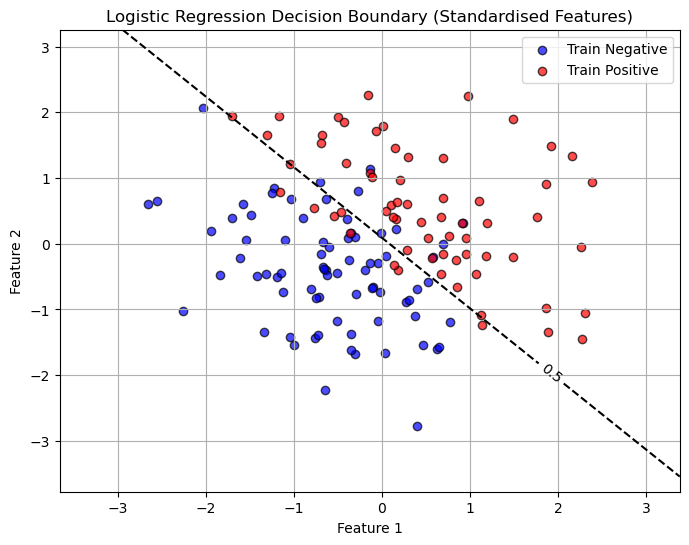

In [22]:
# Create a grid of feature values (in standardized space)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict probabilities for each grid point
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot decision boundary and probability contours
plt.figure(figsize=(8,6))
contour = plt.contour(xx, yy, Z, levels=[0.5],
                      colors=['black'], linestyles=['--', '-', '--'])

plt.clabel(contour, fmt={ 0.5:'0.5'}, inline=True, fontsize=10)

# Plot training data (already standardized)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1],
            color='blue', alpha=0.7, edgecolor='k', label='Train Negative')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],
            color='red', alpha=0.7, edgecolor='k', label='Train Positive')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary (Standardised Features)")
plt.legend()
plt.grid(True)
plt.show()

There are many ways to think about accuracy when talking about classification problems. Here we will use the `accuracy score` `classification report` and the `confusion matrix`

In [23]:
# Predictions
y_pred = logreg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {acc:.3f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy on test set: 0.850
Confusion Matrix:
[[28  6]
 [ 3 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.79      0.88      0.84        26

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



## Understanding Classification Metrics

The output above has a lot of information!

1. Accuracy

First we see that the accuracy = 0.85. This seems pretty good, but sometimes accuracy can be deceiving! 

It reports the proportion of total predictions that are correct:  
  $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$  

2. Confusion Matrix

The confusion matrix tells us a count of which predictions we got right and wrong,

| | |
| ----------------- | -------- |
| TN | FP |
| FN | FP |

  - **TN** = True Negatives - predicted class 0 belongs to class 0
  - **TP** = True Positives - predicted class 1 belongs to class 1
  - **FN** = False Negatives - predicted class 0 belongs to class 1
  - **FP** = False Positives - predicted class 1 belongs to class 0
  
3. Precision
- Measures the **accuracy of positive predictions**.  
- Formula:  
  $$\text{Precision} = \frac{TP}{TP + FP}$$  

- High precision means few false positives.

3. Recall (Sensitivity or True Positive Rate)
- Measures how well the model **finds all actual positives**.  
- Formula:  
  $$\text{Recall} = \frac{TP}{TP + FN}$$  
  where:  
 
- High recall means few false negatives.

4. F1-Score
- The **harmonic mean** of precision and recall.  
- Formula:  
  $$\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$  
- Balances precision and recall. Useful when classes are imbalanced.

5. Support
- The **number of actual occurrences** of each class in the dataset.  
- Indicates how many samples of each class were present when computing the metrics.

Now all of this depends on where we set our decision boundary! It was somewhat arbitrary to choose $p=0.5$ as the cutoff. 

## Choosing The Decision Boundary

The decision boundary is the "line" that shows when we would say the observations falls under class 0 vs when it would fall under class 1. By default we use a probability of $p=0.5$.

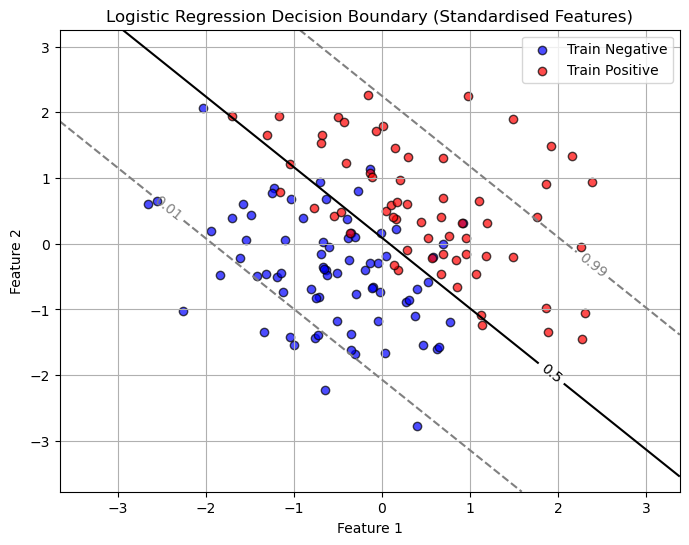

In [25]:
# Create a grid of feature values (in standardized space)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict probabilities for each grid point
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot decision boundary and probability contours
plt.figure(figsize=(8,6))
contour = plt.contour(xx, yy, Z, levels=[0.01, 0.5, 0.99],
                      colors=['gray', 'black', 'gray'], linestyles=['--', '-', '--'])

plt.clabel(contour, fmt={0.01:'0.01', 0.5:'0.5', 0.99:'0.99'}, inline=True, fontsize=10)

# Plot training data (already standardized)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1],
            color='blue', alpha=0.7, edgecolor='k', label='Train Negative')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1],
            color='red', alpha=0.7, edgecolor='k', label='Train Positive')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary (Standardised Features)")
plt.legend()
plt.grid(True)
plt.show()


But the choice of this cutoff is arbitrary! Sometimes a BIG part of the classification problem is figuring out what the cutoff should be!

What if we decide to move the cutoff to $p=0.3$?

In [26]:
# Set a custom cutoff (e.g., 0.3 instead of 0.5)
cutoff = 0.3

# Predicted probabilities for class 1
y_prob = logreg.predict_proba(X_test)[:,1]


y_pred_custom = (y_prob >= cutoff).astype(int)

# Evaluate
acc = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy on test set (cutoff={cutoff}): {acc:.3f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))

Accuracy on test set (cutoff=0.3): 0.833
Confusion Matrix:
[[26  8]
 [ 2 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        34
           1       0.75      0.92      0.83        26

    accuracy                           0.83        60
   macro avg       0.84      0.84      0.83        60
weighted avg       0.85      0.83      0.83        60



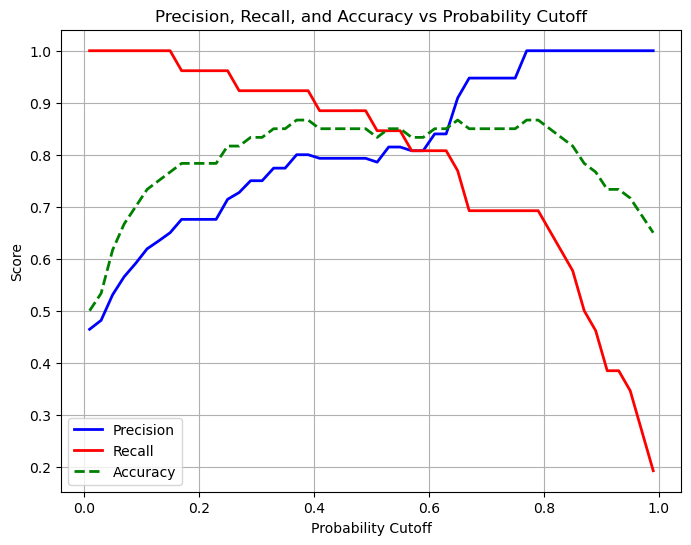

In [28]:
from sklearn.metrics import precision_score, recall_score
# Define a range of cutoffs
cutoffs = np.linspace(0.01, 0.99, 50)
precisions = []
recalls = []
accuracies = []

# Calculate precision, recall, and accuracy for each cutoff
for cutoff in cutoffs:
    y_pred_custom = (y_prob >= cutoff).astype(int)
    precisions.append(precision_score(y_test, y_pred_custom, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_custom, zero_division=0))
    accuracies.append(accuracy_score(y_test, y_pred_custom))

# Plot precision, recall, and accuracy vs cutoff
plt.figure(figsize=(8,6))
plt.plot(cutoffs, precisions, label='Precision', color='blue', linewidth=2)
plt.plot(cutoffs, recalls, label='Recall', color='red', linewidth=2)
plt.plot(cutoffs, accuracies, label='Accuracy', color='green', linestyle='--', linewidth=2)
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.title('Precision, Recall, and Accuracy vs Probability Cutoff')
plt.legend()
plt.grid(True)
plt.show()

Remember perfect recall means that we do not see any false negatives. In this case when we move our probability cutoff to 0.1 we see that we predict almost everything as positive, we don't miss a single positive case with our prediction. It would be important to have high recall when missing positives is a big problem (eg. cancer detection - you don't want false negatives) But our accuracy is very low!

Perfect precision means that we do not see any false positives. In this case when our probability cutoff is moved to 0.99 we see that we predict almost everything as negative, we don't miss a single negative case. It would be important to have high precision in cases when a positive outcome has a large impact (eg. detecting fraud - you don't want false positives). But again our accuracy is low.

The best choice is somewhere in the middle and is highly dependent on the problem you are trying to solve.

## What if our decision boundary was not linear?

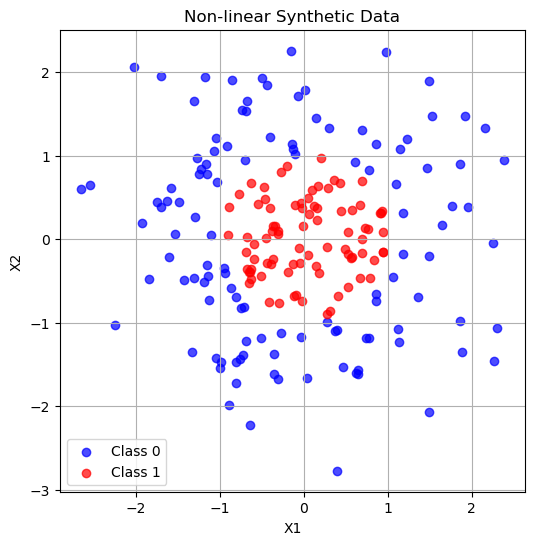

Accuracy: 0.517
Confusion Matrix:
 [[31  4]
 [25  0]]


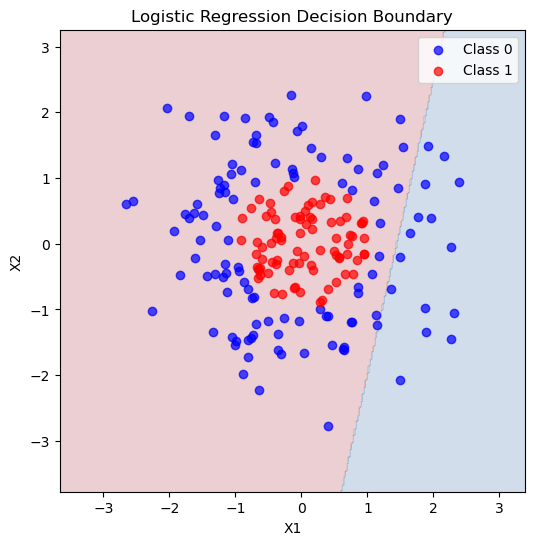

In [29]:
# Generate non-linear separable data (circle)
np.random.seed(0)
n_samples = 200
X = np.random.randn(n_samples, 2)
# Circular decision boundary: points inside radius 1 are class 1, outside are 0
y = (X[:,0]**2 + X[:,1]**2 < 1).astype(int)

# Plot the data
plt.figure(figsize=(6,6))
plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0', alpha=0.7)
plt.scatter(X[y==1,0], X[y==1,1], color='red', label='Class 1', alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Non-linear Synthetic Data')
plt.legend()
plt.grid(True)
plt.show()

# Train logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0', alpha=0.7)
plt.scatter(X[y==1,0], X[y==1,1], color='red', label='Class 1', alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


How did we do at predicting these classes? We got ALL of the class 1 data right! But our accuracy was actually pretty low and we can see from the picture that the decision boundary really did not match our data. We were particularly bad a predicting class 0!

We can use polynomial features here too!

In [30]:
# --- Create polynomial features (degree 2) ---
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# --- Fit logistic regression on polynomial features ---
logreg_poly = LogisticRegression(max_iter=500)
logreg_poly.fit(X_train_poly, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


Accuracy with polynomial features: 0.917
Confusion Matrix:
 [[30  5]
 [ 0 25]]


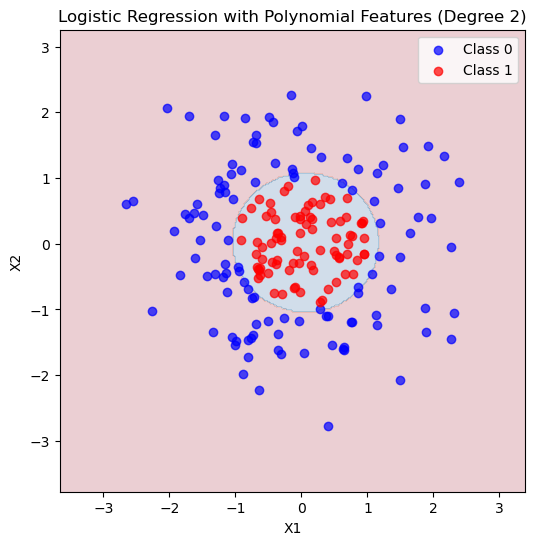

In [31]:

# Predict and evaluate
y_pred = logreg_poly.predict(X_test_poly)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with polynomial features: {acc:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- Plot decision boundary ---
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.transform(grid)
Z = logreg_poly.predict(grid_poly).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')
plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0', alpha=0.7)
plt.scatter(X[y==1,0], X[y==1,1], color='red', label='Class 1', alpha=0.7)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Logistic Regression with Polynomial Features (Degree 2)')
plt.legend()
plt.show()

We still have over vs underfitting!

## You Try

Play around with the code above, degree 1 is definitely underfitting - a straight line does not capture the complexity of this data. How do higher degree fits do?